In [0]:
# google-drive-ocamlfuseのインストール
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Colab用のAuth token作成
from google.colab import auth
auth.authenticate_user()

# Drive FUSE library用のcredential生成
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# drive/ を作り、そこにGoogle Driveをマウントする
!mkdir -p drive
!google-drive-ocamlfuse drive

# 正常にマウントできれば対象Google Drive内容が表示される
!ls drive/

In [1]:
cd drive/Colab Notebooks/retouch_image

/content/drive/Colab Notebooks/retouch_image


In [0]:
!pip install opencv-python

In [0]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [0]:
imgA = Image.open('img/nagasawa.jpg')
imgB = Image.open('img/yoshizawa.jpg')

In [0]:
# imgA = cv2.imread('img/nagasawa.jpg')
# imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)

# imgB = cv2.imread('img/yoshizawa.jpg')
# imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)

In [0]:
plt.imshow(imgA)

In [0]:
average_color_per_row_A = np.average(imgA, axis=0)
average_color_per_row_B = np.average(imgB, axis=0)

In [0]:
average_color_A = np.average(average_color_per_row_A, axis=0)
average_color_A = np.uint8(average_color_A)
print(average_color_A)

average_color_B = np.average(average_color_per_row_B, axis=0)
average_color_B = np.uint8(average_color_B)
print(average_color_B)

In [0]:
Red_A, Green_A, Blue_A = average_color_A[:3]
Red_B, Green_B, Blue_B = average_color_B[:3]

In [0]:
Red_A,Red_B

In [0]:
plt.imshow(imgA)

In [0]:
from PIL import Image
import numpy as np

img = Image.open('img/nagasawa.jpg')
width, height = img.size

output = Image.new('RGB',size)

for y in range(height):
  for x in range(width):
    r,g,b = img.getpixel((x,y))
    
    r -= (Red_A - Red_B)
    g -= (Green_A - Green_B)
    b -= (Blue_A - Blue_B)
    
    output.putpixel((x,y),(r,g,b,0))
    
    
plt.imshow(output)
# img2.save('bokashi.jpg')

In [0]:
plt.imshow(imgB)

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
imgA = Image.open('img/nagasawa2.jpg')
imgB = Image.open('img/yoshizawa.jpg')

In [0]:
histA,bins = np.histogram(imgA,bins=256)

plt.plot(hist)
plt.xlim(0,256)

In [0]:
histB,bins = np.histogram(imgB,bins=256)

plt.plot(histB)
plt.xlim(0,256)

In [0]:
cdf = histA.cumsum()

cdf = 255 * cdf / cdf[-1]

plt.plot(cdf)
plt.xlim(0,256)
plt.ylim(0,256)

In [0]:
imgA2 = np.interp(imgA, bins[:-1], cdf)
histA2,bins = np.histogram(imgA2,bins=256)

plt.plot(histA2)
plt.xlim(0,256)

In [0]:
plt.imshow(imgA2)

In [0]:
from PIL import Image
import numpy as np

im = np.array(Image.open('img/nagasawa2.jpg'), 'f')  # floatで読み込み

im_1_22 = 255.0 * (im / 255.0)**(1 / 2.2)
# im_22 = 255.0 * (im / 255.0)**2.2

im_gamma = np.concatenate((im_1_22, im, im_22), axis=1)

pil_img = Image.fromarray(np.uint8(im_gamma))  # floatをuintに変換
# pil_img.save('data/dst/lena_numpy_gamma.jpg')
plt.imshow(pil_img)

In [0]:
# pixel毎のRGB平均値の計算

average_color_per_row_A = np.average(imgA, axis=0)
average_color_A = np.average(average_color_per_row_A, axis=0)
average_color_A = np.uint8(average_color_A)

average_color_per_row_B = np.average(imgB, axis=0)
average_color_B = np.average(average_color_per_row_B, axis=0)
average_color_B = np.uint8(average_color_B)

print(average_color_A)
print(average_color_B)

In [0]:
# pixel毎のRGB中央値の計算

median_color_per_row_A = np.median(imgA, axis=0)
median_color_A = np.median(median_color_per_row_A, axis=0)
median_color_A = np.uint8(median_color_A)

median_color_per_row_B = np.median(imgB, axis=0)
median_color_B = np.median(median_color_per_row_B, axis=0)
median_color_B = np.uint8(median_color_B)

print(median_color_A)
print(median_color_B)

In [0]:
Red_A, Green_A, Blue_A = median_color_A[:3]
Red_B, Green_B, Blue_B = median_color_B[:3]

print(Red_A + Green_A + Blue_A)
print(Red_B + Green_B + Blue_B)

In [0]:
211+203+183

In [0]:
# Red_A, Green_A, Blue_A = average_color_A[:3]
# Red_B, Green_B, Blue_B = average_color_B[:3]

In [0]:
width, height = imgA.size

output = Image.new('RGB',size)

for y in range(height):
  for x in range(width):
    r,g,b = imgA.getpixel((x,y))
    
    if Red_A>Red_B:
      r -= (Red_A - Red_B)
      g -= (Green_A - Green_B)
      b -= (Blue_A - Blue_B)
      
    else:
      r += (Red_A - Red_B)
      g += (Green_A - Green_B)
      b += (Blue_A - Blue_B)
    
    output.putpixel((x,y),(r,g,b,0))
    
plt.imshow(output)
# output.save('output.jpg')

In [0]:
# pixel毎のRGB平均値の計算

average_color_per_row_O = np.average(output, axis=0)
average_color_O = np.average(average_color_per_row_O, axis=0)
average_color_O = np.uint8(average_color_O)

print(average_color_O)

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline
 
#入力ファイルのパスを指定
in_jpg = "img/nagasawa2.jpg"
# out_jpg = "./photo_out/1.jpg"
 
#入力画像の表示
plt.show(plt.imshow(np.asarray(Image.open(in_jpg))))
 
# 画像の読み込み 
image_gs = cv2.imread(in_jpg)
 
# グレースケールに変換
image_gs = cv2.cvtColor(image_gs, cv2.COLOR_BGR2RGB)
 
# 顔認識用特徴量ファイルを読み込む --- （カスケードファイルのパスを指定）
cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
# 顔認識の実行
face_list = cascade.detectMultiScale(image_gs,scaleFactor=1.1,minNeighbors=1,minSize=(100,100))
 
#顔が１つ以上検出された時
if len(face_list) > 0:
    for rect in face_list:
        image_gs = image_gs[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#顔が検出されなかった時
else:
    print("no face")

# cv2.imwrite(out_jpg, image_gs)
    
#出力画像の表示
plt.imshow(image_gs)

In [0]:
image_gs.shape

In [0]:
# pixel毎のRGB平均値の計算

average_color_per_row_A = np.average(image_gs, axis=0)
average_color_A = np.average(average_color_per_row_A, axis=0)
average_color_A = np.uint8(average_color_A)

average_color_per_row_B = np.average(imgB, axis=0)
average_color_B = np.average(average_color_per_row_B, axis=0)
average_color_B = np.uint8(average_color_B)

print(average_color_A)
print(average_color_B)

In [0]:
from PIL import Image
import numpy as np

width, height = image_gs.shape[:-1]
size = image_gs.shape[:-1]

output = Image.new('RGB',size)

for y in range(height):
  for x in range(width):
    r,g,b = image_gs.getpixel((x,y))
    
    if Red_A>Red_B:
      r -= (Red_A - Red_B)
      g -= (Green_A - Green_B)
      b -= (Blue_A - Blue_B)
      
    else:
      r += (Red_A - Red_B)
      g += (Green_A - Green_B)
      b += (Blue_A - Blue_B)
    
    output.putpixel((x,y),(r,g,b,0))
    
plt.imshow(output)
# output.save('output.jpg')

In [3]:
!pip install opencv-python

In [0]:
import os
import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [0]:
input_imgA = glob.glob("./img/nagasawa_v2/*.png")
imgB = Image.open('img/yoshizawa.jpg')

In [37]:
for i in input_imgA:
  imgA_cv2 = cv2.imread(i)
  imgA_cv2= cv2.cvtColor(imgA_cv2, cv2.COLOR_BGR2RGB)

  imgA = Image.open(i)
  
  cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
  face_list = cascade.detectMultiScale(imgA_cv2,scaleFactor=1.1,minNeighbors=1,minSize=(100,100))

  if len(face_list) > 0:
      for rect in face_list:
          faceA = imgA_cv2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
  else:
      print("no face")

  # cv2.imwrite(out_jpg, image_gs)
  #出力画像の表示
  #plt.imshow(faceA)
  
  average_color_per_row_A = np.average(imgA, axis=0)
  average_color_A = np.average(average_color_per_row_A, axis=0)
  average_color_A = np.uint8(average_color_A)

  average_color_per_row_B = np.average(imgB, axis=0)
  average_color_B = np.average(average_color_per_row_B, axis=0)
  average_color_B = np.uint8(average_color_B)

#   print(average_color_A)
#   print(average_color_B)
    
  Red_A, Green_A, Blue_A = average_color_A[:3]
  Red_B, Green_B, Blue_B = average_color_B[:3]
  
  width, height = imgA.size
  size = imgA.size

  output = Image.new('RGB',size)

  for y in range(height):
    for x in range(width):
      r,g,b = imgA.getpixel((x,y))

      if Red_A>Red_B:
        r -= (Red_A - Red_B)
        g -= (Green_A - Green_B)
        b -= (Blue_A - Blue_B)

      else:
        r += (Red_A - Red_B)
        g += (Green_A - Green_B)
        b += (Blue_A - Blue_B)

      output.putpixel((x,y),(r,g,b,0))
    
  ftitle, fext = os.path.splitext(i)
  output.save(ftitle + '_retouch' + fext)
  
print("complite")

no face
no face
complite


In [0]:
# 画像の読み込み 
imgA_cv2 = cv2.imread('img/nagasawa2.jpg')
imgA_cv2= cv2.cvtColor(imgA_cv2, cv2.COLOR_BGR2RGB)

imgA = Image.open('img/nagasawa2.jpg')
imgB = Image.open('img/yoshizawa.jpg')

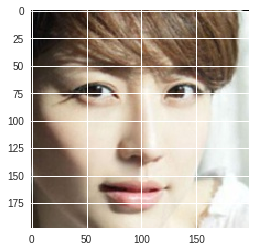

In [25]:
# 顔認識用特徴量ファイルを読み込む --- （カスケードファイルのパスを指定）
cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
# 顔認識の実行
face_list = cascade.detectMultiScale(imgA_cv2,scaleFactor=1.1,minNeighbors=1,minSize=(100,100))
 
#顔が１つ以上検出された時
if len(face_list) > 0:
    for rect in face_list:
        faceA = imgA_cv2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#顔が検出されなかった時
else:
    print("no face")

# cv2.imwrite(out_jpg, image_gs)
#出力画像の表示
plt.imshow(faceA)

In [29]:
# pixel毎のRGB平均値の計算

average_color_per_row_A = np.average(imgA, axis=0)
average_color_A = np.average(average_color_per_row_A, axis=0)
average_color_A = np.uint8(average_color_A)

average_color_per_row_B = np.average(imgB, axis=0)
average_color_B = np.average(average_color_per_row_B, axis=0)
average_color_B = np.uint8(average_color_B)

print(average_color_A)
print(average_color_B)

[163 152 140]
[128  79  64]


In [0]:
Red_A, Green_A, Blue_A = average_color_A[:3]
Red_B, Green_B, Blue_B = average_color_B[:3]

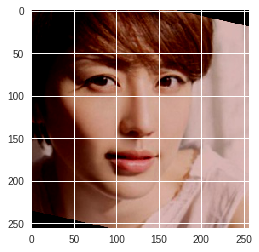

In [31]:
width, height = imgA.size
size = imgA.size

output = Image.new('RGB',size)

for y in range(height):
  for x in range(width):
    r,g,b = imgA.getpixel((x,y))
    
    if Red_A>Red_B:
      r -= (Red_A - Red_B)
      g -= (Green_A - Green_B)
      b -= (Blue_A - Blue_B)
      
#     else:
#       r += (Red_A - Red_B)
#       g += (Green_A - Green_B)
#       b += (Blue_A - Blue_B)
    
    output.putpixel((x,y),(r,g,b,0))
    
plt.imshow(output)
output.save('output_img/.jpg')

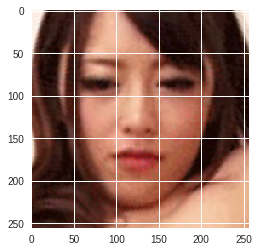

In [32]:
plt.imshow(imgB)